In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta

pd.set_option('display.max_rows', 120)
pd.set_option('display.max_columns', 120)

%load_ext autoreload
%autoreload 2
from utils import show_heat_map, print_mutual_info, aggregate_data, resample_df, load_big_df
from utils import two_sig_signal, two_sig_signal_multi, get_yulu_df

In [7]:
df_raw = pd.read_csv("../simulation_data/output_2025-03-15_20250312_HYPEUSDTOB500_HYPEUSDTtrades_VX.csv")
df_buy, df_sell, df_ob = aggregate_data(df_raw)
df_ob

,time,mid,bidsize_1,bidsize_2,bidsize_3,bidsize_4,bidsize_5,asksize_1,asksize_2,asksize_3,asksize_4,asksize_5,bidprice_1,bidprice_2,bidprice_3,bidprice_4,bidprice_5,askprice_1,askprice_2,askprice_3,askprice_4,askprice_5,trade_side,trade_size,trade_price
0,2025-03-12 00:00:01.326999808,13.7955,83.67,127.86,184.08,385.43,480.86,42.68,182.43,235.09,863.29,902.17,13.795,13.793,13.792,13.790,13.789,13.796,13.798,13.799,13.801,13.802,NaN,NaN,NaN
1,2025-03-12 00:00:01.426000128,13.7955,83.67,127.86,184.08,385.43,480.86,42.68,182.43,235.09,863.29,902.17,13.795,13.793,13.792,13.790,13.789,13.796,13.798,13.799,13.801,13.802,NaN,NaN,NaN
2,2025-03-12 00:00:01.526000128,13.7955,83.16,127.35,183.57,302.93,398.36,43.51,183.26,235.92,864.12,903.00,13.795,13.793,13.792,13.790,13.789,13.796,13.798,13.799,13.801,13.802,NaN,NaN,NaN
3,2025-03-12 00:00:01.625999872,13.7955,83.16,127.35,183.57,302.93,398.36,43.51,183.26,235.92,864.12,903.00,13.795,13.793,13.792,13.790,13.789,13.796,13.798,13.799,13.801,13.802,NaN,NaN,NaN
4,2025-03-12 00:00:01.726000128,13.7955,83.16,122.39,178.61,297.97,359.74,43.51,183.26,235.92,864.12,903.00,13.795,13.793,13.792,13.790,13.789,13.796,13.798,13.799,13.801,13.802,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1619215,2025-03-13 00:00:00.926000128,13.1725,20.09,180.46,611.29,842.98,1167.07,6.46,72.24,321.37,763.58,813.18,13.172,13.170,13.169,13.168,13.166,13.173,13.175,13.176,13.177,13.179,NaN,NaN,NaN
1619216,2025-03-13 00:00:01.026000128,13.1725,20.26,180.63,611.46,843.15,1167.24,6.46,52.24,301.37,743.58,793.18,13.172,13.170,13.169,13.168,13.166,13.173,13.175,13.176,13.177,13.179,NaN,NaN,NaN
1619217,2025-03-13 00:00:01.125999872,13.1725,20.26,180.63,611.46,843.15,1241.86,441.65,454.97,571.44,572.01,621.61,13.172,13.170,13.169,13.168,13.166,13.173,13.175,13.176,13.177,13.179,NaN,NaN,NaN
1619218,2025-03-13 00:00:01.226000128,13.1725,9.95,170.32,601.15,832.84,1149.34,441.65,558.12,558.69,559.26,591.90,13.172,13.170,13.169,13.168,13.166,13.173,13.176,13.177,13.178,13.179,NaN,NaN,NaN


In [20]:

df_raw['time'] = pd.to_datetime(df_raw['time'], unit='s')
df_trades = df_raw[(df_raw['trade_side'] == 'Buy') | (df_raw['trade_side'] == 'Sell')][['time', 'trade_side', 'trade_size', 'trade_price']]

df_trades.set_index('time', inplace=True)
df_trades['rounded_time'] = df_trades.index.round('100ms')
df_trades

,trade_side,trade_size,trade_price,rounded_time
time,,,,
2025-03-12 00:00:01.810099968,Sell,0.74,13.795,2025-03-12 00:00:01.800
2025-03-12 00:00:03.245100032,Buy,0.04,13.796,2025-03-12 00:00:03.200
2025-03-12 00:00:03.245100032,Buy,0.36,13.796,2025-03-12 00:00:03.200
2025-03-12 00:00:03.249999872,Buy,0.31,13.796,2025-03-12 00:00:03.200
2025-03-12 00:00:03.249999872,Buy,4.10,13.796,2025-03-12 00:00:03.200
...,...,...,...,...
2025-03-12 23:59:59.568600064,Sell,13.79,13.176,2025-03-12 23:59:59.600
2025-03-12 23:59:59.568600064,Sell,4.24,13.176,2025-03-12 23:59:59.600
2025-03-12 23:59:59.569299968,Sell,0.60,13.175,2025-03-12 23:59:59.600


In [26]:
lookup = df_ob.resample('100ms').last()

lookup['mid'] = lookup['mid'].ffill()
lookup['return_1min'] = np.log(lookup['mid'].shift(-10 * 60) / lookup['mid'])
lookup['future_price_1min'] = lookup['mid'].shift(-10 * 60)
# lookup['return_1min']

df_trades['return_1min'] = df_trades['rounded_time'].map(lookup['return_1min']) #.plot(kind='hist', bins=30)
df_trades['future_price_1min'] = df_trades['rounded_time'].map(lookup['future_price_1min']) #.plot(kind='hist', bins=30)
df_trades

,trade_side,trade_size,trade_price,rounded_time,return_1min,future_price_1min
time,,,,,,
2025-03-12 00:00:01.810099968,Sell,0.74,13.795,2025-03-12 00:00:01.800,0.002136,13.8250
2025-03-12 00:00:03.245100032,Buy,0.04,13.796,2025-03-12 00:00:03.200,0.002245,13.8265
2025-03-12 00:00:03.245100032,Buy,0.36,13.796,2025-03-12 00:00:03.200,0.002245,13.8265
2025-03-12 00:00:03.249999872,Buy,0.31,13.796,2025-03-12 00:00:03.200,0.002245,13.8265
2025-03-12 00:00:03.249999872,Buy,4.10,13.796,2025-03-12 00:00:03.200,0.002245,13.8265
...,...,...,...,...,...,...
2025-03-12 23:59:59.568600064,Sell,13.79,13.176,2025-03-12 23:59:59.600,NaN,NaN
2025-03-12 23:59:59.568600064,Sell,4.24,13.176,2025-03-12 23:59:59.600,NaN,NaN
2025-03-12 23:59:59.569299968,Sell,0.60,13.175,2025-03-12 23:59:59.600,NaN,NaN


0.01751945623645113


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1070: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='trade_size', ylabel='trade_return'>

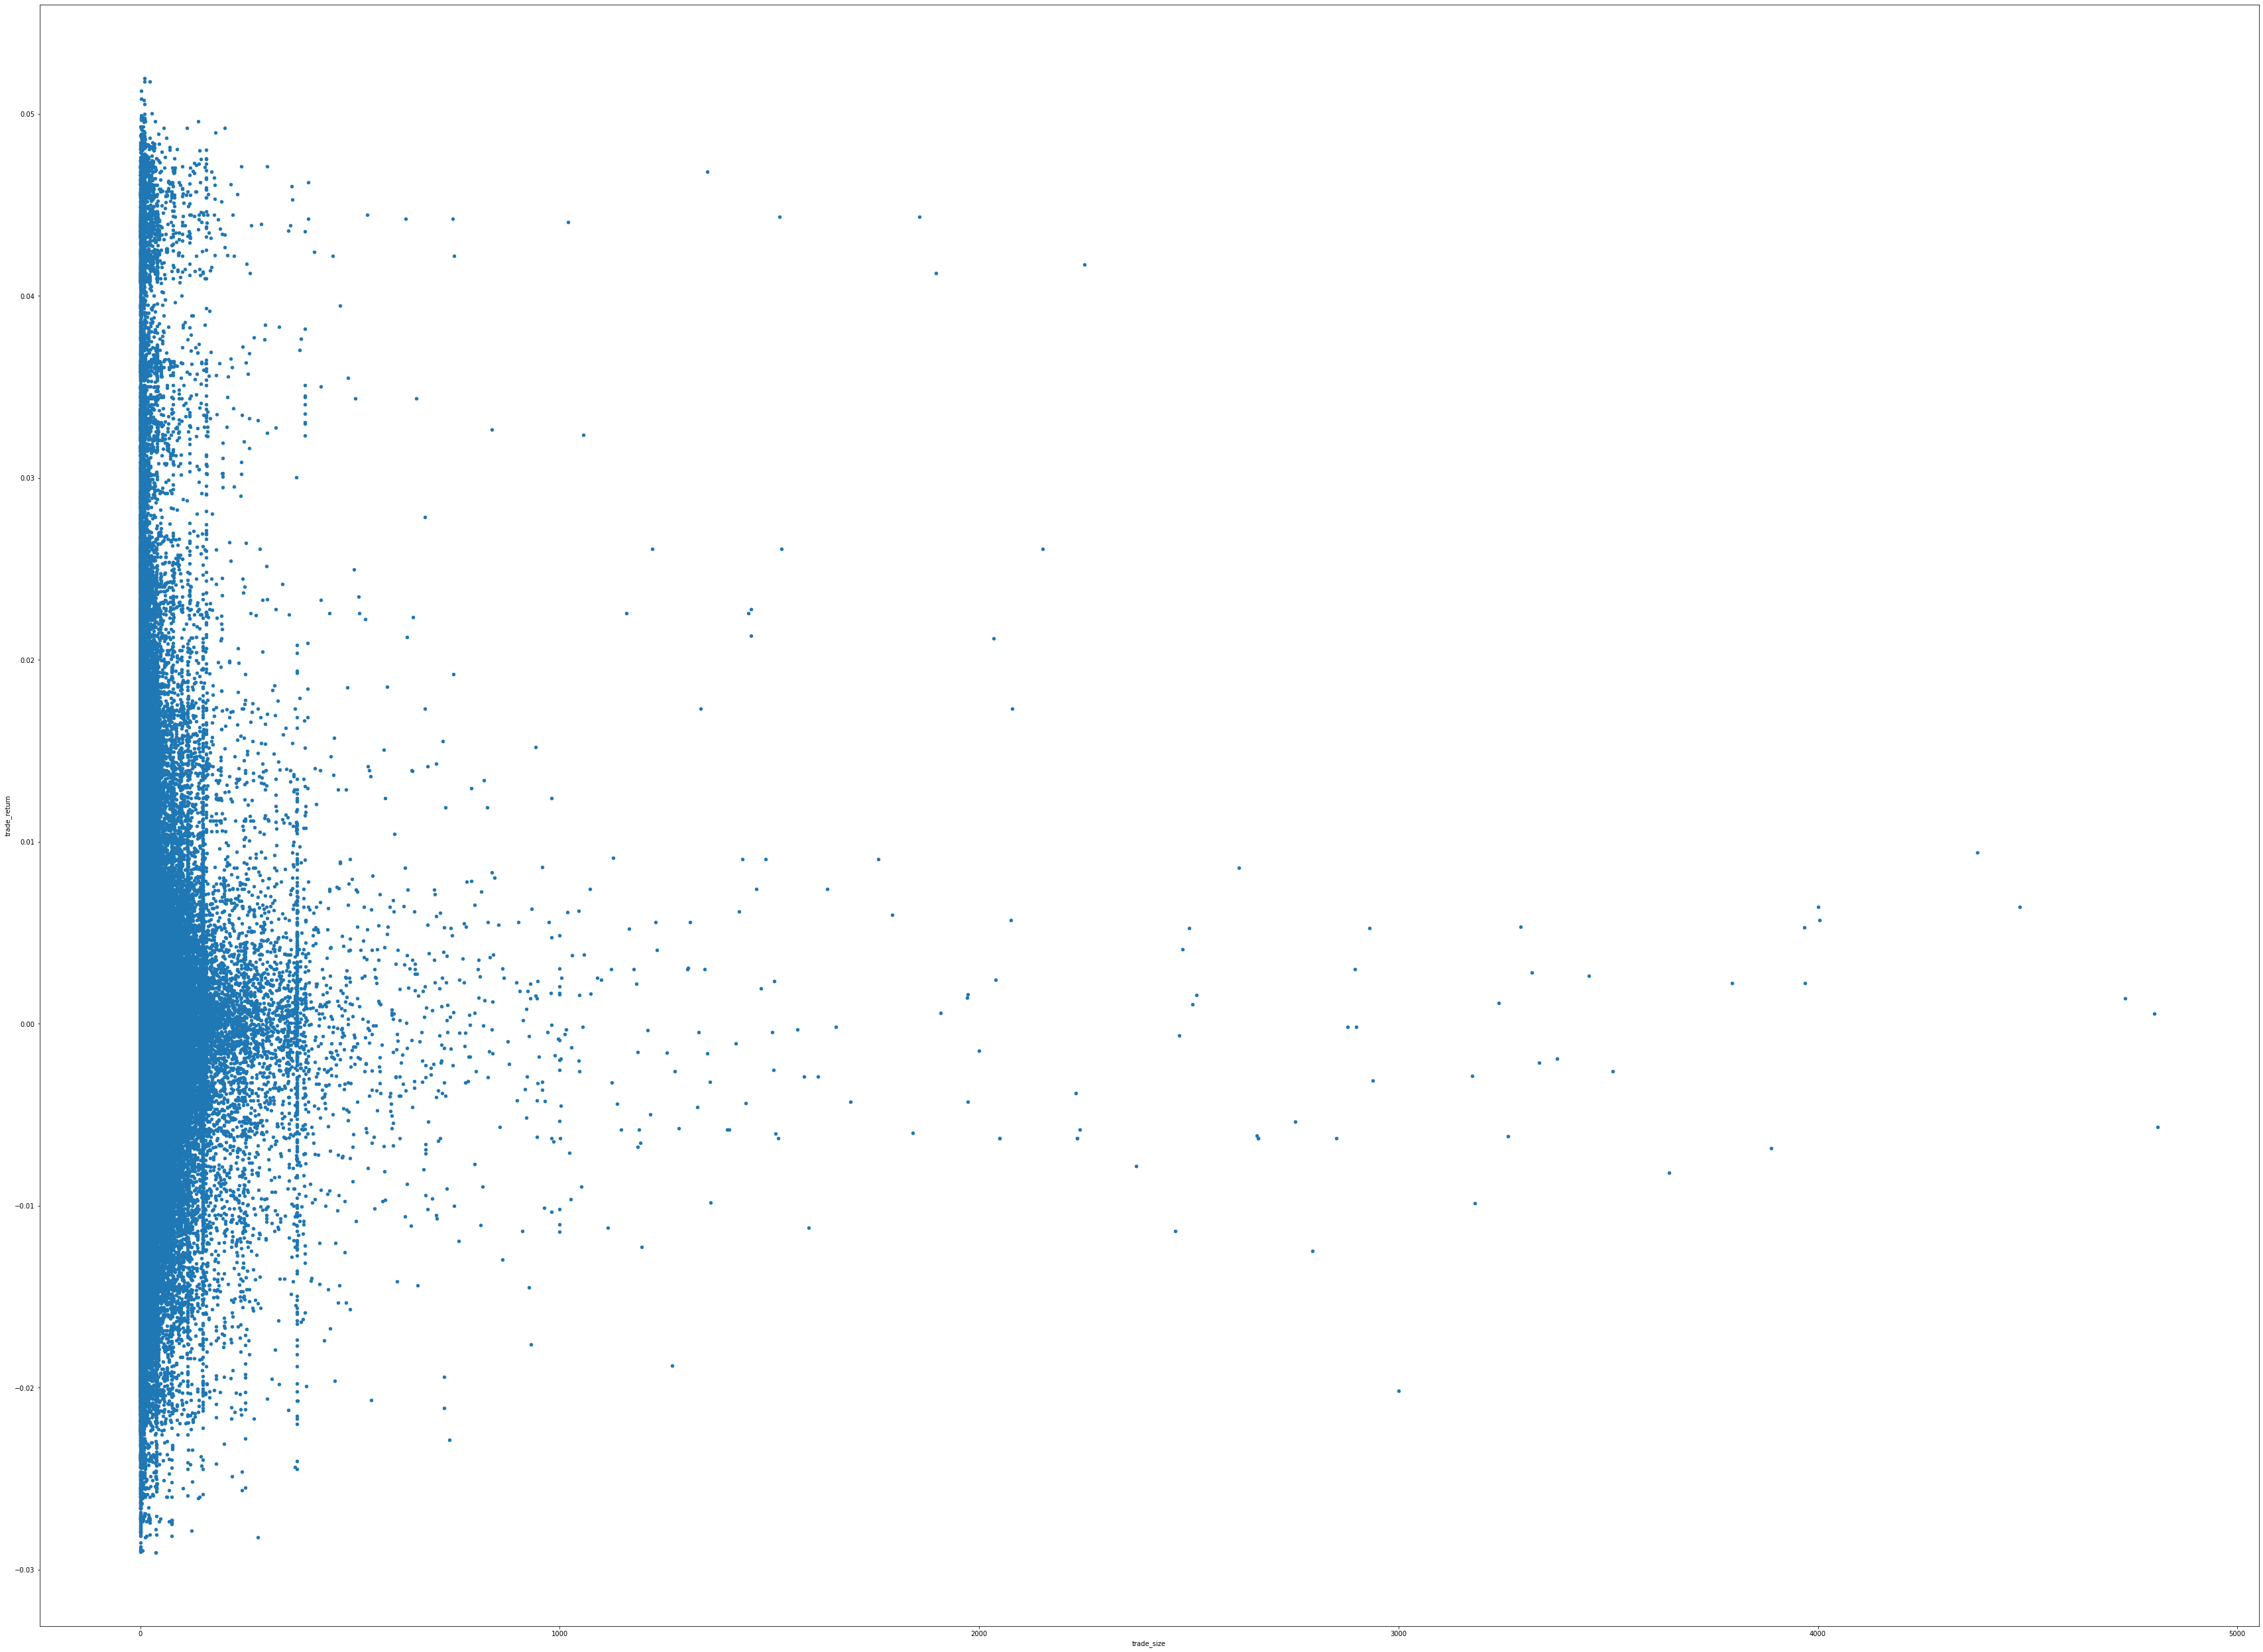

In [40]:
df_trades['trade_return'] = (df_trades['future_price_1min'] / df_trades['trade_price'] - 1)

df3 = df_trades[df_trades['trade_side'] == 'Buy']
print(df3['trade_size'].corr(df3['trade_return']))
df3.plot(kind='scatter', x='trade_size', y='trade_return', figsize=(60, 45))

0.0025740311483033775


<Axes: xlabel='trade_size', ylabel='trade_return'>

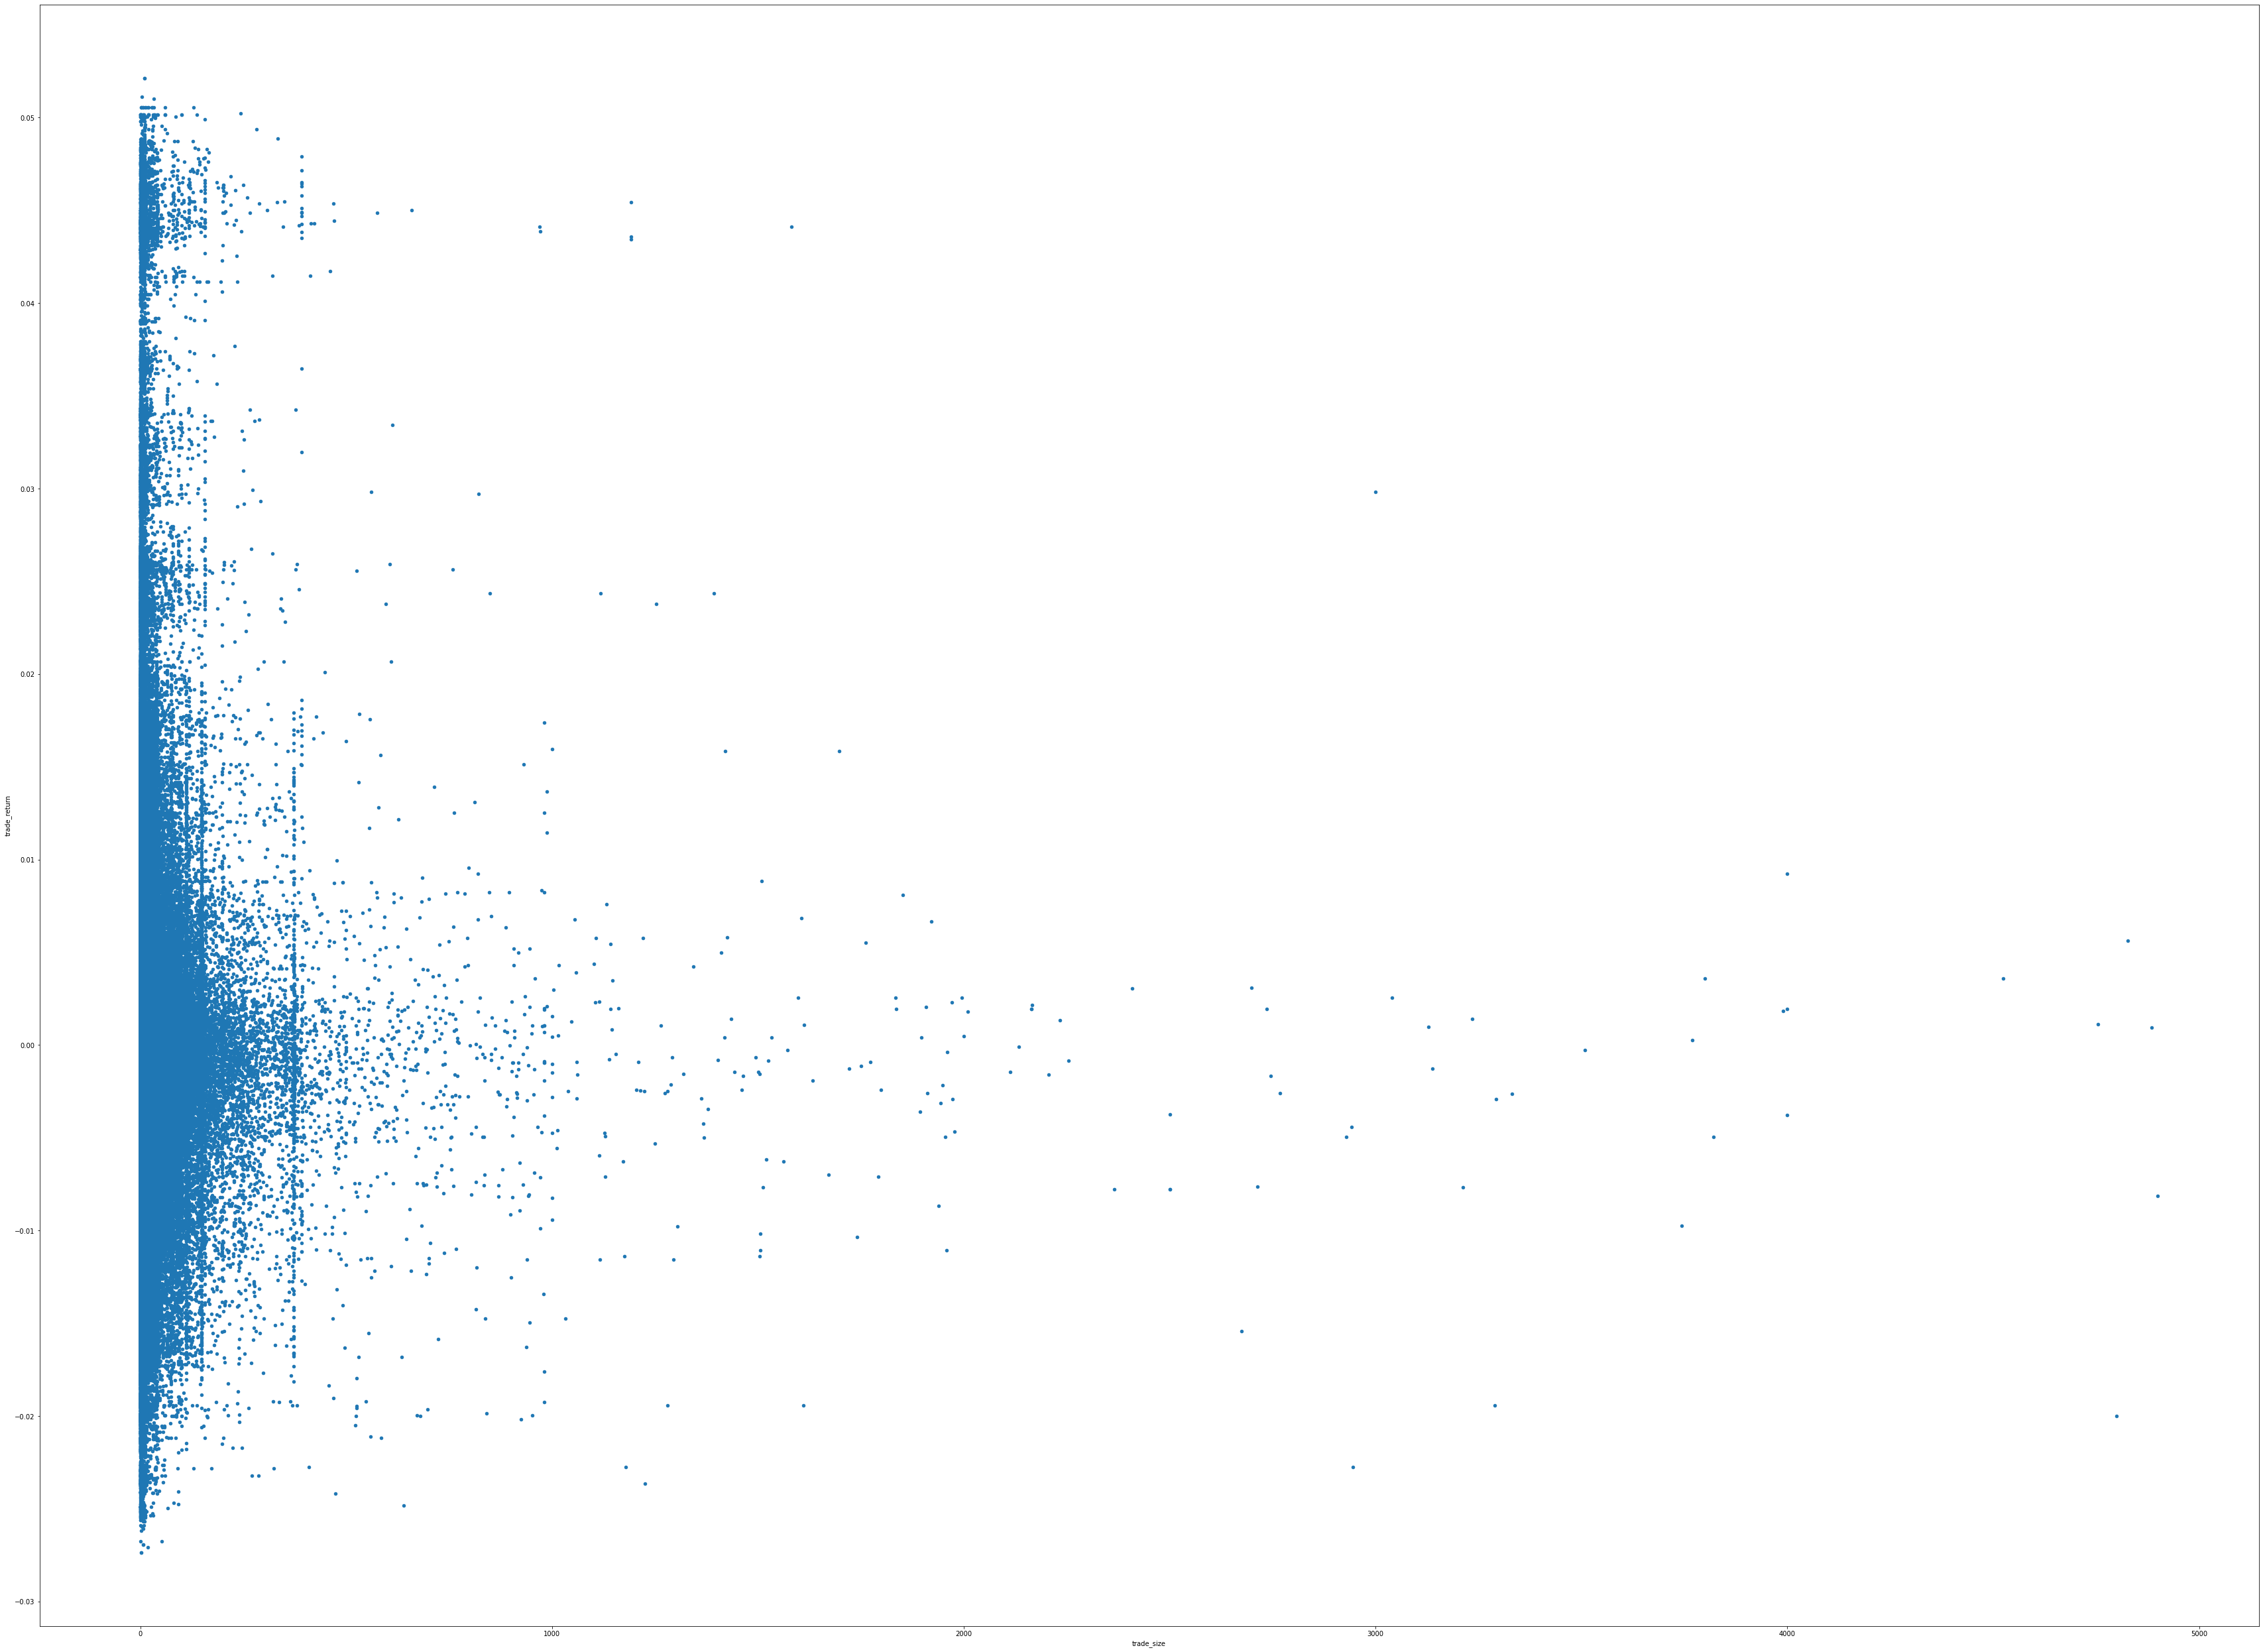

In [41]:

df3 = df_trades[df_trades['trade_side'] == 'Sell']
print(df3['trade_size'].corr(df3['trade_return']))
df3.plot(kind='scatter', x='trade_size', y='trade_return', figsize=(60, 45))